In [28]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import chainer
import chainer.functions as F
import chainer.links as L
import chainer.initializers as I
import chainer.variable as V
import chainer.optimizers as optimizers

In [21]:
l = L.LSTM(100,50)

In [124]:
l.reset_state()
x = V.Variable(np.random.randn(10, 100).astype(np.float32))
y = l(x)

In [130]:
class RNN(chainer.Chain):
    def __init__(self, word_count):
        super(RNN, self).__init__(
            embed=L.EmbedID(word_count, 100),  # word embedding
            mid=L.LSTM(100, 50),  # the first LSTM layer
            out=L.Linear(50, word_count),  # the feed-forward output layer
        )

    def reset_state(self):
        self.mid.reset_state()

    def __call__(self, cur_word):
        # Given the current word ID, predict the next word.
        x = self.embed(cur_word)
        h = self.mid(x)
        y = self.out(h)
        return y


In [31]:
def compute_loss(x_list):
    loss = 0
    for cur_word, next_word in zip(x_list, x_list[1:]):
        loss += model(cur_word, next_word)
    return loss

In [136]:
with open('text2.txt', encoding='utf8') as f:
    text = f.read()
    #text = f.readlines()
w_list = text#.split()
print(len(w_list))
i = 0
wordmap = {y: i for y, i in zip(w_list, range(len(w_list)))}
wordmap
idmap = {wordmap[x]: x for x in wordmap}
idmap
x_list = np.array([[wordmap[w] for w in w_list]], dtype=np.int32).T
print(x_list)

15441
[[15428]
 [15401]
 [15422]
 ..., 
 [15438]
 [15439]
 [15440]]


In [137]:
rnn = RNN(len(w_list))
model = L.Classifier(rnn)
optimizer = optimizers.SGD()
optimizer.setup(model)

In [138]:
loss_hist = []
for i in range(100):
    if i % 10 == 0:
        print(i)
    # Suppose we have a list of word variables x_list.
    rnn.reset_state()
    model.cleargrads()
    loss = compute_loss(x_list)
    loss.backward()
    loss_hist.append(loss.data)
    optimizer.update()

0


KeyboardInterrupt: 

In [139]:
loss_hist = []

In [140]:
for i in range(100):
    loss = 0
    count = 0
    seqlen = len(x_list[1:])

    rnn.reset_state()
    for cur_word, next_word in zip(x_list, x_list[1:]):
        loss += model(cur_word, next_word)
        count += 1
        if count % 100 == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()
            loss_hist.append(loss.data)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


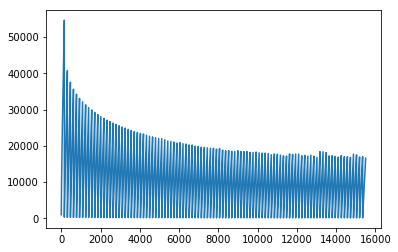

In [141]:
plt.plot(loss_hist)

In [149]:
chainer.serializers.save_npz("result/rnn.model", model)

In [148]:
start_x = np.random.randint(len(w_list), size=(5,1))
#print(start_x)
rnn.reset_state()
model.cleargrads()
predicted = []
#for cur_word, next_word in zip(start_x, start_x[1:]):
#    predicted.append(rnn(cur_word, next_word).data)
for cur_word in start_x:
    rnn(cur_word)
for i in range(1000):
    next_word = np.array([[rnn(cur_word).data.argmax()]], dtype=np.int32)
    predicted.append(next_word[0][0])
    cur_word = next_word
#print(predicted)
words = ''
for wid in start_x:
    words += w_list[wid] + ''
for wid in predicted:
    words += w_list[wid] + ''
print(words)

iy  ronds and Coverad Ters Trump’s fiep and the Washington Post)
Share 
Subshdrs a of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president of the president

D:\Programs\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [129]:
L.EmbedID?